In [1]:
import numpy as np
import pandas as pd
import math
import srd

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
plt.rcParams['axes.unicode_minus'] = False  
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [3]:
p_m = pd.read_csv('p_metric_29.csv',index_col=0)
n_m = pd.read_csv('n_metric_29.csv',index_col=0)

In [4]:
df = pd.concat([p_m,n_m])

In [5]:
ref1 = 'max'
refVector1 = srd.calc_ref(p_m , ref1)
ref2 = 'min'
refVector2 = srd.calc_ref(n_m , ref2)
refVector = pd.concat([refVector1,refVector2])

In [6]:
refVector

Metric
Overall ACC      0.786204
Overall RACCU    0.555807
Overall RACC     0.523609
Kappa            0.565771
Gwet AC1         0.582302
                   ...   
dInd             0.310117
CEN              0.625765
MCEN             0.675151
Overall CEN      0.586283
Overall MCEN     0.460776
Length: 78, dtype: float64

In [7]:
dfr=df.rank()
rVr=refVector.rank()
diffs=dfr.subtract(rVr,axis=0)

srd_values=diffs.abs().sum()

k=math.floor(len(df)/2)
if len(df)%2 == 0:
    maxSRD = 2*k**2
else:
    maxSRD = 2*k*(k+1)
    
srd_values=srd_values/maxSRD*100

srd_values

CSEL               8.021039
Stacking_NuSCV    20.775805
Stacking_Ridge    20.052597
Stacking_RF       21.236029
Stacking_ETs      21.893491
Stacking_LR       22.419461
DF                24.457594
Ada               30.177515
Bagging           27.613412
BNB               30.473373
DT                33.859303
ET                34.188034
ETs               20.775805
GBC               29.224195
GNB               36.226167
GP                35.765943
KNN               40.565417
LDA               30.769231
LinearSVC         29.783037
LR                27.876397
NuSVC             22.616700
PA                30.703485
Perceptron        27.087442
QDA               45.693623
RF                23.471400
Ridge             22.419461
SGD               29.322814
SVC               28.566732
XGB               28.665352
dtype: float64

In [8]:
srd_values.to_csv("srd_values.csv")

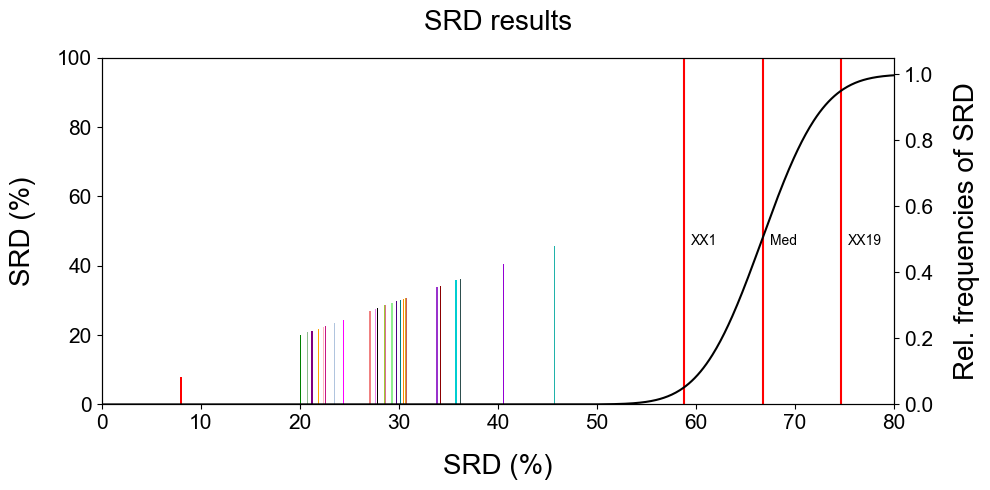

In [9]:
fig, ax = plt.subplots(figsize=(10,5))

my_colors = ['red','blue','green','purple','orange',
             'brown','magenta','teal','violet','darkorange',
             'darkorchid', 'darkred', 'darkseagreen', 'darkslateblue','darkslategrey',
             'darkturquoise', 'darkviolet','indianred', 'indigo','black',
             'mediumvioletred','goldenrod','lightcoral','lightseagreen','lightsteelblue',
             'lightpink','lightgreen','yellowgreen','palevioletred']

bars=ax.bar(srd_values, srd_values, color=my_colors,width=0.12)

ax.set_xlim(left=0,right=80)
ax.set_ylim(bottom=0,top=100)


[x,y,XX1,Med,XX19] = srd.crrn(len(df))

if XX1:
    ax.vlines(XX1,0,100,label='XX1',color='red')
    ax.annotate('XX1', xy=(XX1, 50), xytext=(5, -10), textcoords="offset points")
if Med:
    ax.vlines(Med,0,100,label='Med',color='red')
    ax.annotate('Med', xy=(Med, 50), xytext=(5, -10), textcoords="offset points")
if XX19:
    ax.vlines(XX19,0,100,label='XX19',color='red')
    ax.annotate('XX19', xy=(XX19, 50), xytext=(5, -10), textcoords="offset points")
    
ax2 = ax.twinx()
ax2.plot(x,y,color='black')
ax2.set_ylabel('Rel. frequencies of SRD',size=20,labelpad=15)
ax2.set_ylim(bottom=0)
ax2.tick_params(labelsize=15)

ax.set_title('SRD results',size=20,pad=20)
ax.set_xlabel('SRD (%)',size=20,labelpad=15)
ax.set_ylabel('SRD (%)',size=20,labelpad=15)
ax.tick_params(labelsize=15)

fig.tight_layout()

plt.savefig('Fig2-a.pdf', bbox_inches='tight')
plt.show()
